In [35]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings("ignore")

### 회귀 트리
- 회귀 함수를 기반으로 하지 않고 결정 트리와 같이 트리를 기반으로 하는 회귀 방식
- 회귀를 위한 트리를 생성하고 이를 기반으로 회귀 예측
- 리프 노드에서 예측 결정 값을 만드는 과정에서 분류 트리가 특정 클래스 레이블을 결정하는 것과 달리 회귀 트리는 리프 노드에 속한 데이터 값의 평균값을 구해 회귀 예측값을 계산
- 결정트리, 랜덤 포레스트, GBM, XGBOOST, LIGHTGBM 등 트리 기반의 알고리즘은 분류뿐만 아니라 회귀도 가능한데 트리 생성이 CART(Classification And Regression Trees)에 기반하고 있기 때문이며 CART는 분류뿐만 아니라 회귀도 가능하게 해주는 트리 생성 알고리즘임

In [4]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df["PRICE"] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
y_target = boston_df.PRICE
X_data = boston_df.drop(["PRICE"], axis = 1)

rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5 교차 검증의 개별 Negative MSE : ", np.round(neg_mse_scores, 2))
print("5 교차 검증의 개별 RMSE : ", np.round(rmse_scores, 2))
print("5 교차 검증의 평균 RMSE : ", np.round(avg_rmse, 2))

5 교차 검증의 개별 Negative MSE :  [ -7.89 -13.06 -20.62 -46.14 -18.81]
5 교차 검증의 개별 RMSE :  [2.81 3.61 4.54 6.79 4.34]
5 교차 검증의 평균 RMSE :  4.42


In [20]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print("5 교차 검증의 개별 Negative MSE : ", np.round(neg_mse_scores, 2))
    print("5 교차 검증의 개별 RMSE : ", np.round(rmse_scores, 2))
    print("5 교차 검증의 평균 RMSE : ", np.round(avg_rmse, 2))

In [16]:
dt = DecisionTreeRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
lgb = LGBMRegressor()

In [21]:
get_model_cv_prediction(dt, X_data, y_target)

5 교차 검증의 개별 Negative MSE :  [-12.51 -52.82 -28.07 -54.05 -75.44]
5 교차 검증의 개별 RMSE :  [3.54 7.27 5.3  7.35 8.69]
5 교차 검증의 평균 RMSE :  6.43


In [22]:
get_model_cv_prediction(gb, X_data, y_target)

5 교차 검증의 개별 Negative MSE :  [ -7.46 -12.95 -19.36 -37.77 -15.34]
5 교차 검증의 개별 RMSE :  [2.73 3.6  4.4  6.15 3.92]
5 교차 검증의 평균 RMSE :  4.16


In [23]:
get_model_cv_prediction(xgb, X_data, y_target)

5 교차 검증의 개별 Negative MSE :  [ -9.17 -13.74 -13.95 -41.77 -18.68]
5 교차 검증의 개별 RMSE :  [3.03 3.71 3.74 6.46 4.32]
5 교차 검증의 평균 RMSE :  4.25


In [24]:
get_model_cv_prediction(lgb, X_data, y_target)

5 교차 검증의 개별 Negative MSE :  [ -9.   -15.73 -18.18 -43.95 -24.96]
5 교차 검증의 개별 RMSE :  [3.   3.97 4.26 6.63 5.  ]
5 교차 검증의 평균 RMSE :  4.57


<AxesSubplot:>

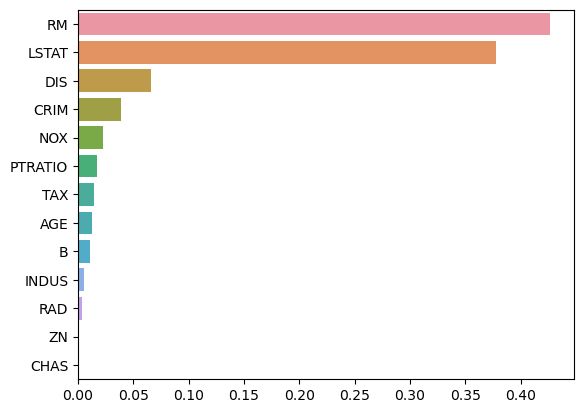

In [27]:
rf.fit(X_data, y_target)
feature_series = pd.Series(data = rf.feature_importances_,index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)
sns.barplot(x = feature_series, y = feature_series.index)

In [32]:
boston_df_sample = boston_df[["RM","PRICE"]]
boston_df_sample = boston_df_sample.sample(n = 100, random_state = 0)

In [33]:
lr = LinearRegression()
dt2 = DecisionTreeRegressor(max_depth = 2)
dt7 = DecisionTreeRegressor(max_depth = 7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

X_feature = boston_df_sample["RM"].values.reshape(-1,1)
y_target = boston_df_sample["PRICE"].values.reshape(-1,1)

lr.fit(X_feature, y_target)
dt2.fit(X_feature, y_target)
dt7.fit(X_feature, y_target)

pred_lr = lr.predict(X_test)
pred_dt2 = dt2.predict(X_test)
pred_dt7 = dt7.predict(X_test)

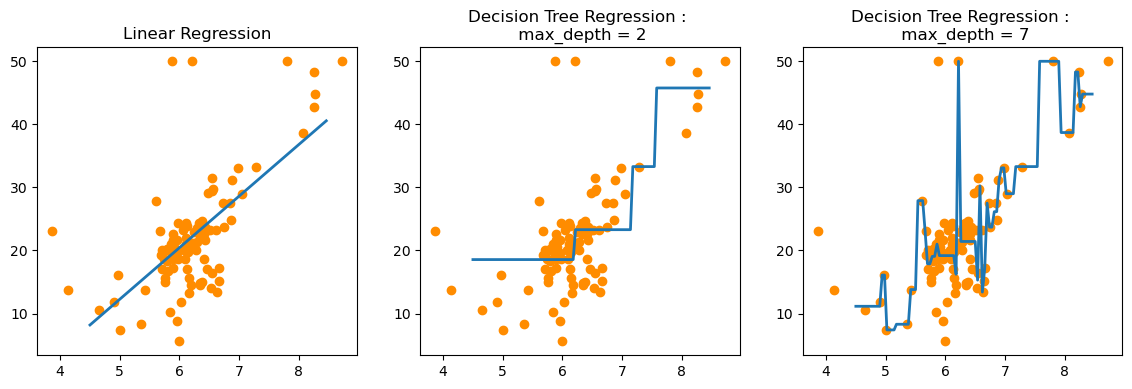

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize = (14,4), ncols = 3)

ax1.set_title("Linear Regression")
ax1.scatter(boston_df_sample.RM , boston_df_sample.PRICE, c = "darkorange")
ax1.plot(X_test, pred_lr, label = "linear", linewidth = 2)

ax2.set_title("Decision Tree Regression : \n max_depth = 2")
ax2.scatter(boston_df_sample.RM , boston_df_sample.PRICE, c = "darkorange")
ax2.plot(X_test, pred_dt2, label = "max_depth : 2", linewidth = 2)

ax3.set_title("Decision Tree Regression : \n max_depth = 7")
ax3.scatter(boston_df_sample.RM , boston_df_sample.PRICE, c = "darkorange")
ax3.plot(X_test, pred_dt7, label = "max_depth : 7", linewidth = 2)

In [37]:
boston_df_sample

,RM,PRICE
329,6.333,22.6
371,6.216,50.0
219,6.373,23.0
403,5.349,8.3
78,6.232,21.2
...,...,...
246,6.108,24.3
374,4.138,13.8
56,6.383,24.7
455,6.525,14.1
